# Regression

In [87]:
#install dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.utils.validation import check_is_fitted
import statsmodels.api as sm

%matplotlib inline

In [25]:
# read the dataset into python
df = pd.read_csv("Bank Data.csv")

### Exploratory Data Analysis

We can explore the dataset before running our analysis. View the summary and descriptions of the dataset.

In [4]:
# Get a glimpse of the dataset.
df.head()

,Client_id,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Bal,Total_Trans_Amt
0,768805383,45,M,3,39,5,12691.0,777,1144
1,818770008,49,F,5,44,6,8256.0,864,1291
2,713982108,51,M,3,36,4,3418.0,0,1887
3,769911858,40,F,4,34,3,3313.0,2517,1171
4,709106358,40,M,3,21,5,4716.0,0,816


In [5]:
# Brief information of the columns, the datatype and number of missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Client_id                 10127 non-null  int64  
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Months_on_book            10127 non-null  int64  
 5   Total_Relationship_Count  10127 non-null  int64  
 6   Credit_Limit              10127 non-null  float64
 7   Total_Bal                 10127 non-null  int64  
 8   Total_Trans_Amt           10127 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 712.2+ KB


In [6]:
# A summary of the entire dataset
df.describe()

,Client_id,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Credit_Limit,Total_Bal,Total_Trans_Amt
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,8631.953698,1162.814061,4404.086304
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,9088.776650,814.987335,3397.129254
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,1438.300000,0.000000,510.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2555.000000,359.000000,2155.500000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,4549.000000,1276.000000,3899.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,11067.500000,1784.000000,4741.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,34516.000000,2517.000000,18484.000000


In [7]:
# To see if we have duplicated rows
df.duplicated().sum()

0

In [27]:
# Renaming columns
df.rename(columns = {'Client_id':'client_id','Customer_Age':'age','Dependent_count':'depend_count','Months_on_book':'duration',
          'Total_Relationship_Count':'relationship_count','Credit_Limit':'credit_limit','Total_Bal':'balance','Total_Trans_Amt':'total_trans'}, inplace = True)
df.head()

,client_id,age,Gender,depend_count,duration,relationship_count,credit_limit,balance,total_trans
0,768805383,45,M,3,39,5,12691.0,777,1144
1,818770008,49,F,5,44,6,8256.0,864,1291
2,713982108,51,M,3,36,4,3418.0,0,1887
3,769911858,40,F,4,34,3,3313.0,2517,1171
4,709106358,40,M,3,21,5,4716.0,0,816


In [28]:
# Converting the datatype of the client_id to text.
df.client_id = df.client_id.astype(str)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 0 to 10126
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   client_id           10127 non-null  object 
 1   age                 10127 non-null  int64  
 2   Gender              10127 non-null  object 
 3   depend_count        10127 non-null  int64  
 4   duration            10127 non-null  int64  
 5   relationship_count  10127 non-null  int64  
 6   credit_limit        10127 non-null  float64
 7   balance             10127 non-null  int64  
 8   total_trans         10127 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 791.2+ KB


In [60]:
# Correlation Matrix
df.corr()

,age,depend_count,duration,relationship_count,credit_limit,balance,total_trans
age,1.000000,-0.122254,0.788912,-0.010931,0.002476,0.014780,-0.046446
depend_count,-0.122254,1.000000,-0.103062,-0.039076,0.068065,-0.002688,0.025046
duration,0.788912,-0.103062,1.000000,-0.009203,0.007507,0.008623,-0.038591
relationship_count,-0.010931,-0.039076,-0.009203,1.000000,-0.071386,0.013726,-0.347229
credit_limit,0.002476,0.068065,0.007507,-0.071386,1.000000,0.042493,0.171730
balance,0.014780,-0.002688,0.008623,0.013726,0.042493,1.000000,0.064370
total_trans,-0.046446,0.025046,-0.038591,-0.347229,0.171730,0.064370,1.000000


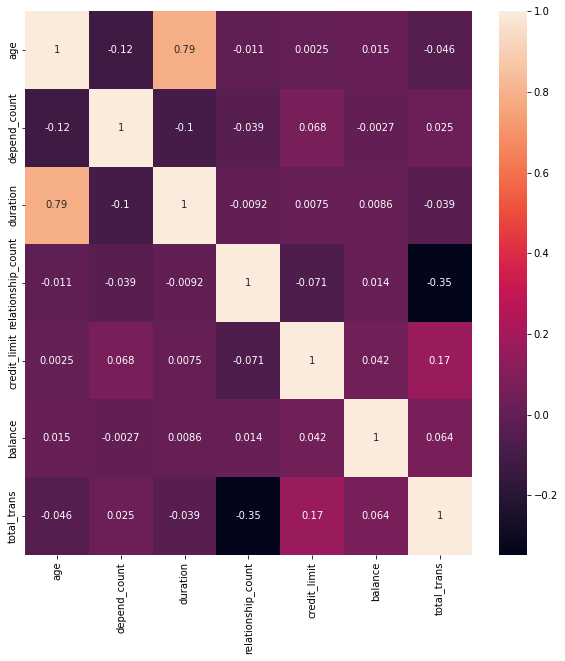

In [69]:
# Graphical representation
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True);

## Simple Regression Model

Refers to establishing the relationship between one independent variables and one dependent variables.

We start with predicting the Credit limit with only the total transaction

In [70]:
# Instantiating our independent variable, taking only the first 9000 rows
features = ["total_trans"]
X_full = df[features]
X_train = X_full[:9000]
print(X_train.shape)
X_train.head()

(9000, 1)


,total_trans
0,1144
1,1291
2,1887
3,1171
4,816


In [76]:
# Dependent Variable
target = "credit_limit"
y_full = df[target]
y_train = y_full[:9000]
y_test = y_full[9000:]
y_train.head()

0    12691.0
1     8256.0
2     3418.0
3     3313.0
4     4716.0
Name: credit_limit, dtype: float64

### Baseline Model

In [37]:
y_mean = y_train.mean()
y_mean.round(2)

8631.95

In [57]:
# Create a list of the mean as the baseline model
y_pred_baseline = [y_mean] * len(y_train)

9000

In [58]:
# Mean Absolute Error
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("Mean apt price", round(y_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean apt price 8631.95
Baseline MAE: 6612.92


In [44]:
# Instantiating the regression model
model = LinearRegression()

In [48]:
# fitting the regression model
model.fit(X_train,y_train)

LinearRegression()

In [49]:
check_is_fitted(model)

In [68]:
# Generate predictions
y_pred_training = model.predict(X_train)
y_pred_training = pd.Series(y_pred_training)
y_pred_training.head()

0    8158.183290
1    8142.976378
2    8081.321141
3    8155.390184
4    8192.114360
dtype: float64

In [51]:
# Checking out the mean absolute error
mae_training = mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training, 2))

Training MAE: 6317.57


Mean Absolute error implies that, on average, the forecast's distance from the actual value is 6317.57.

A lower MAE indicates a better model

In [55]:
# Checking the coefficient of determination
r2_training = r2_score(y_train, y_pred_training)
r2_training * 100

0.03612944934878737

The R2 (coefficient of determination) is 0.036%.  

This means that only 0.036% of the variation in credit limit is explained by the total transaction variable.

In [74]:
# Declare the X_test
X_test = X_full[9000:]
X_test.shape

(1127, 1)

In [75]:
# Predicting test data
y_pred_test = model.predict(X_test)
y_pred_test = pd.Series(y_pred_test)
y_pred_test.head()

0    7470.251535
1    7475.941196
2    7386.044550
3    7408.906643
4    7427.010110
dtype: float64

In [78]:
# Checking out the mean absolute error
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_score_test = r2_score(y_test, y_pred_test)
print("Test MAE:", round(mae_test, 2))
print("Test R2:", round(r2_score_test, 2))

Test MAE: 9230.16
Test R2: -0.44


### Mulitple Regression

Here we use the statsmodels library

In [117]:
# Instantiating our independent variables (3 columns)
features = ["total_trans","age","duration"]
X_full = df[features]
X_train1 = X_full[:9000]
print(X_train1.shape)
X_train1.head()

(9000, 3)


,total_trans,age,duration
0,1144,45,39
1,1291,49,44
2,1887,51,36
3,1171,40,34
4,816,40,21


In [104]:
# add constant to predictor variables
X_train1 = sm.add_constant(X_train1)

In [105]:
# Dependent Variable
target = "credit_limit"
y_full = df[target]
y_train1 = y_full[:9000]
y_train1.head()

0    12691.0
1     8256.0
2     3418.0
3     3313.0
4     4716.0
Name: credit_limit, dtype: float64

In [109]:
# fit the regression model
model = sm.OLS(y_train1, X_train).fit()

In [110]:
# view model summary
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:           credit_limit   R-squared (uncentered):                   0.449
Model:                            OLS   Adj. R-squared (uncentered):              0.449
Method:                 Least Squares   F-statistic:                              2447.
Date:                Tue, 23 Aug 2022   Prob (F-statistic):                        0.00
Time:                        18:05:50   Log-Likelihood:                         -94370.
No. Observations:                9000   AIC:                                  1.887e+05
Df Residuals:                    8997   BIC:                                  1.888e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------

In [91]:
# Initialize the test data
X_test1 = X_full[9000:]

In [100]:
# Prediction
y_pred_test1 = model.predict(X_test1)
y_pred_test1 = pd.Series(y_pred_test1)
y_pred_test1.head()

9000    10264.033783
9001     7936.921361
9002     8329.423124
9003     7989.306550
9004     8776.533732
dtype: float64